In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [8]:
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

Organize as colunas que serão ultilizadas, e descarte as demais.

In [9]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

Traduzir os nomes das colunas para PT-BR

In [11]:
translations = {
    'title': 'título',
    'price': 'preço',
    'retail_price': 'preço de varejo',
    'currency_buyer': 'moeda do comprador',
    'units_sold': 'unidades vendidas',
    'uses_ad_boosts': 'usa impulsionamento',
    'rating': 'classificação',
    'rating_count': 'quantidade de avaliações',
    'badges_count': 'quantidade de distintivos',
    'badge_product_quality': 'distintivo de qualidade do produto',
    'badge_fast_shipping': 'distintivo de envio rápido',
    'tags': 'tags',
    'product_color': 'cor do produto',
    'product_variation_size_id': 'tamanho da variação do produto',
    'product_variation_inventory': 'inventário da variação do produto',
    'shipping_is_express': 'envio expresso',
    'countries_shipped_to': 'países enviados para',
    'inventory_total': 'inventário total',
    'has_urgency_banner': 'tem banner de urgência',
    'origin_country': 'país de origem',
    'merchant_rating_count': 'quantidade de avaliações do vendedor',
    'merchant_rating': 'classificação do vendedor',
}

In [12]:
df_products.rename(columns=translations, inplace=True)

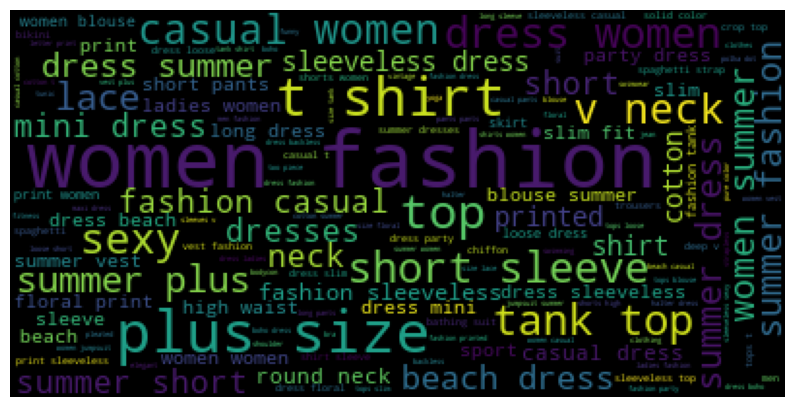

In [55]:
word_string = " ".join(df_products['tags'].str.lower())
word_count = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(10,10))
plt.clf()
plt.imshow(word_count)
plt.axis('off')
plt.show()

# Analise de produtos campeões

In [58]:
df_products["success"] = 0
df_products.loc[df_products["Faturamento"] > 7000, "success"] = 1

C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\1509849531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["success"] = 0


In [59]:
df_products['success'].value_counts()

0    809
1    764
Name: success, dtype: int64

In [60]:
df_products.columns

Index(['título', 'preço', 'preço de varejo', 'moeda do comprador',
       'unidades vendidas', 'usa impulsionamento', 'classificação',
       'quantidade de avaliações', 'quantidade de distintivos',
       'distintivo de qualidade do produto', 'distintivo de envio rápido',
       'tags', 'cor do produto', 'tamanho da variação do produto',
       'inventário da variação do produto', 'envio expresso',
       'países enviados para', 'inventário total', 'tem banner de urgência',
       'país de origem', 'quantidade de avaliações do vendedor',
       'classificação do vendedor', 'Faturamento', 'success'],
      dtype='object')

### Existe um fator que influência na diferença de vendas entre o preço e o preço de varejo?


In [61]:
df_products["Desconto"] = df_products["preço de varejo"] - df_products["preço"]

C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\743886702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products["Desconto"] = df_products["preço de varejo"] - df_products["preço"]


C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\3821568090.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "Desconto"], label="1")
C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\3821568090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

<function matplotlib.pyplot.legend(*args, **kwargs)>

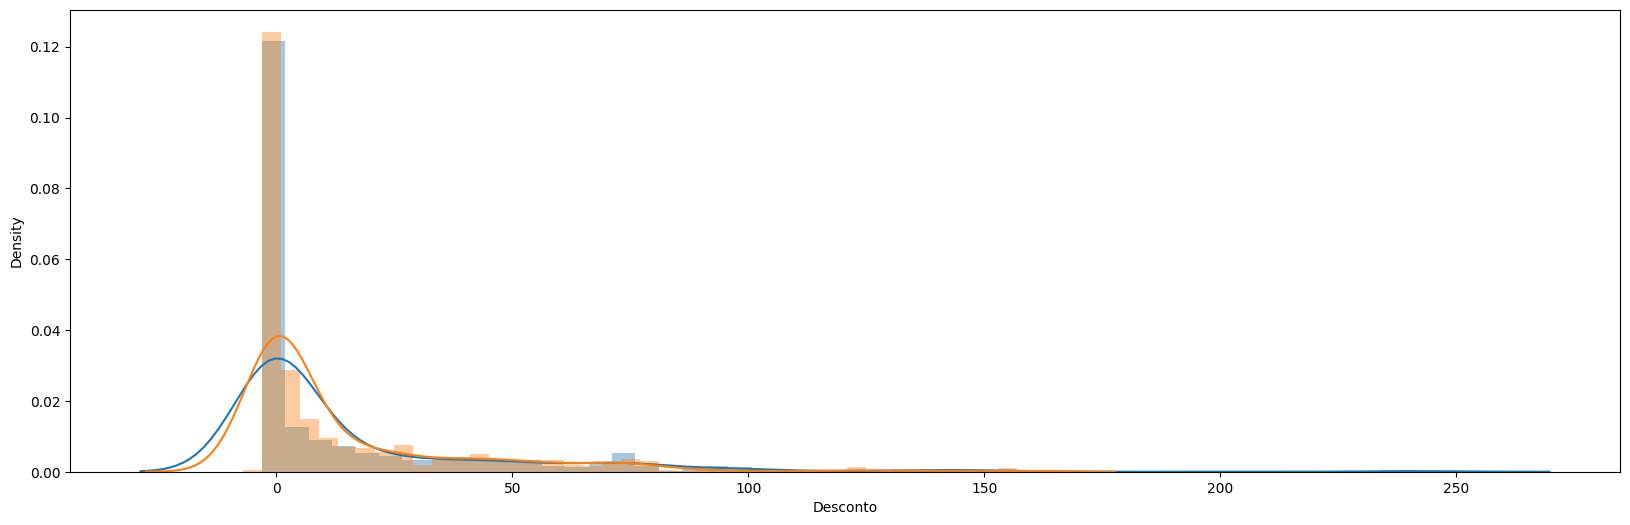

In [69]:
fig, ax = plt.subplots(figsize=(20,6))

sns.distplot(df_products.loc[df_products["success"] == 1, "Desconto"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "Desconto"], label="0")
plt.legend




### AD BOOST aumenta as vendas?


In [75]:
df_products.loc[df_products["success"] == 1, "usa impulsionamento"].value_counts() 

0    451
1    313
Name: usa impulsionamento, dtype: int64

### Avaliações aumenta vendas?


C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\1347979800.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "classificação"], label="1")
C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\1347979800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

<function matplotlib.pyplot.legend(*args, **kwargs)>

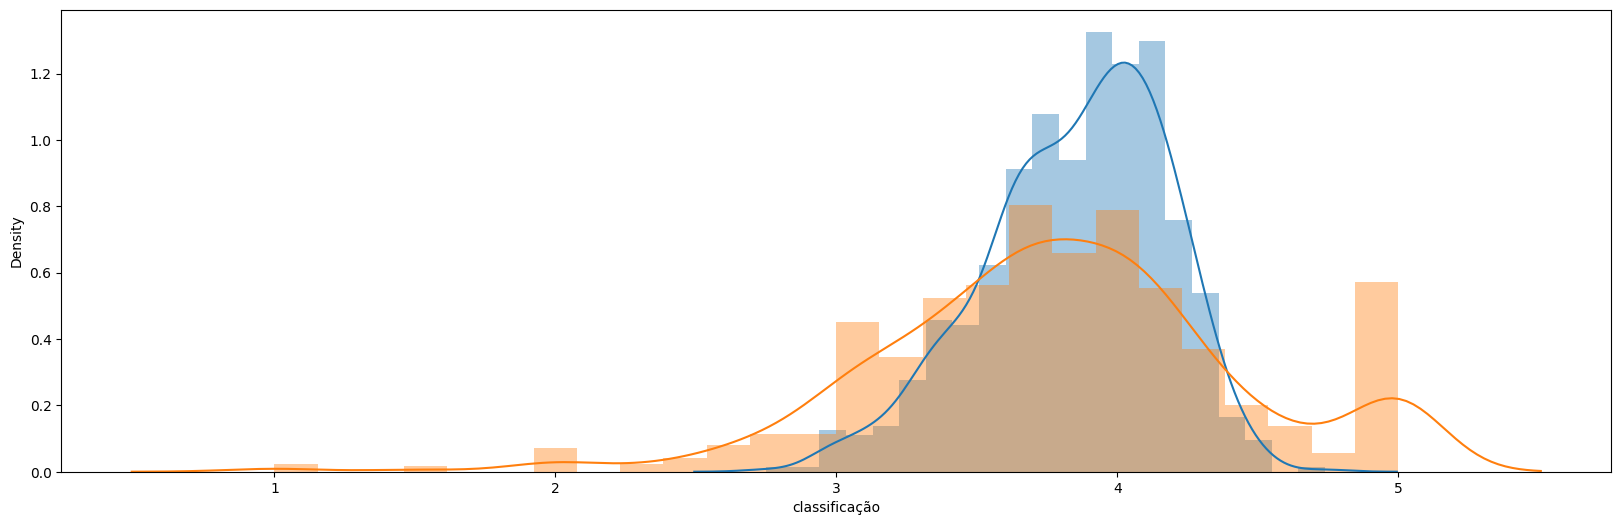

In [76]:
fig, ax = plt.subplots(figsize=(20,6))

sns.distplot(df_products.loc[df_products["success"] == 1, "classificação"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "classificação"], label="0")
plt.legend


### Badges importam 

In [79]:
df_products.groupby(["success", "quantidade de distintivos"]).count()[["título"]].pivot_table(index="success", columns="quantidade de distintivos").fillna(0)

título                
quantidade de distintivos      0     1    2    3
success                                         
0                          753.0  48.0  8.0  0.0
1                          669.0  90.0  3.0  2.0

### Quantidade de Tags aumenta as vendas?

In [80]:
df_products['tags']

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

In [81]:
df_products['tags_count'] = df_products['tags'].apply(lambda x: len(x.split(',')))

C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\642428662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['tags_count'] = df_products['tags'].apply(lambda x: len(x.split(',')))


C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\1587815520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
C:\Users\Jackson\AppData\Local\Temp\ipykernel_9236\1587815520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

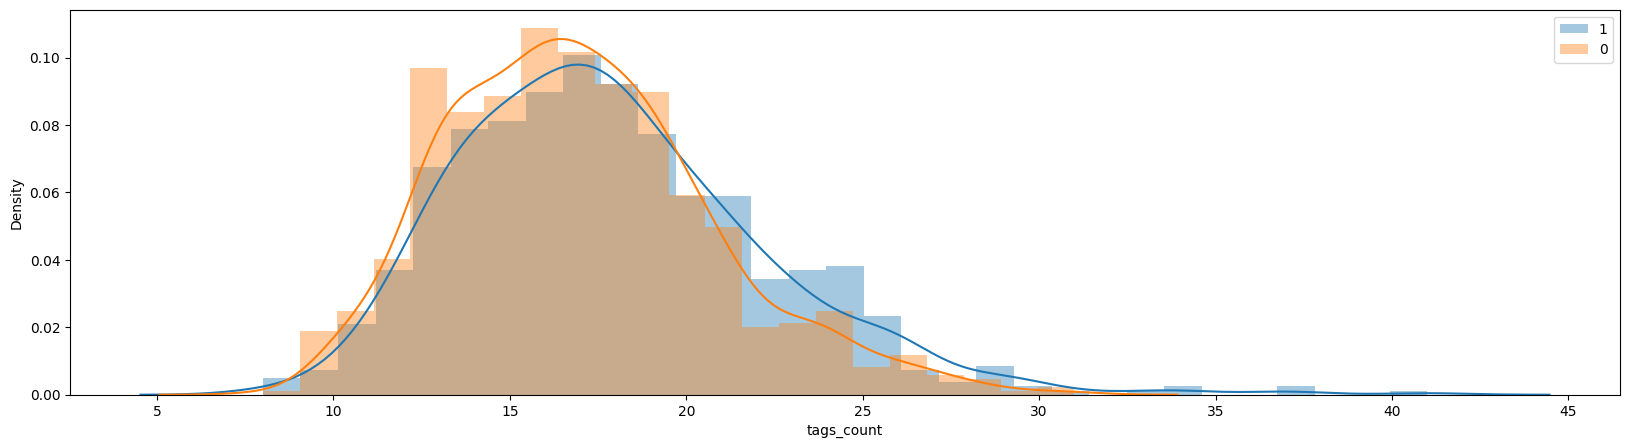

In [82]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="1")
sns.distplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="0")
plt.legend()

### Machinne Learning 

In [87]:
df_products.columns

Index(['título', 'preço', 'preço de varejo', 'moeda do comprador',
       'unidades vendidas', 'usa impulsionamento', 'classificação',
       'quantidade de avaliações', 'quantidade de distintivos',
       'distintivo de qualidade do produto', 'distintivo de envio rápido',
       'tags', 'cor do produto', 'tamanho da variação do produto',
       'inventário da variação do produto', 'envio expresso',
       'países enviados para', 'inventário total', 'tem banner de urgência',
       'país de origem', 'quantidade de avaliações do vendedor',
       'classificação do vendedor', 'Faturamento', 'success', 'Desconto',
       'tags_count'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split

model_cols = ["preço", "preço de varejo", "usa impulsionamento", 
              "classificação", "quantidade de distintivos", "distintivo de qualidade do produto", 
              "distintivo de envio rápido", "inventário da variação do produto", "envio expresso", "países enviados para", 
              "inventário total", "tem banner de urgência", "classificação do vendedor", "Desconto", "tags_count"]

x = df_products[model_cols]
y = df_products["success"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

### Analise pontual


In [91]:
rf_model = grid_search.best_estimator_

In [92]:
# Seleciona um dado do data frame de teste para comparar os resultado de treino e o que é de fato EFETIVO

x_test.iloc[0].to_frame().transpose()

,preço,preço de varejo,usa impulsionamento,classificação,quantidade de distintivos,distintivo de qualidade do produto,distintivo de envio rápido,inventário da variação do produto,envio expresso,países enviados para,inventário total,tem banner de urgência,classificação do vendedor,Desconto,tags_count
177,11.0,10.0,1.0,3.76,0.0,0.0,0.0,50.0,0.0,42.0,50.0,0.0,3.735537,-1.0,17.0


In [97]:
#ALGORITMO
rf_model.predict(x_test.iloc[3].to_frame().transpose())

array([1], dtype=int64)

In [96]:
#EFETIVO

y_test.iloc[3]

1

### Acurácia

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       225
           1       0.80      0.68      0.74       247

    accuracy                           0.74       472
   macro avg       0.75      0.75      0.74       472
weighted avg       0.75      0.74      0.74       472

[[182  43]
 [ 78 169]]


### Agora chega a parte de realizar o entendimento de como o modelo chegou a esse resultado.

Ref. Doni.

**Feature importance**

<Axes: >

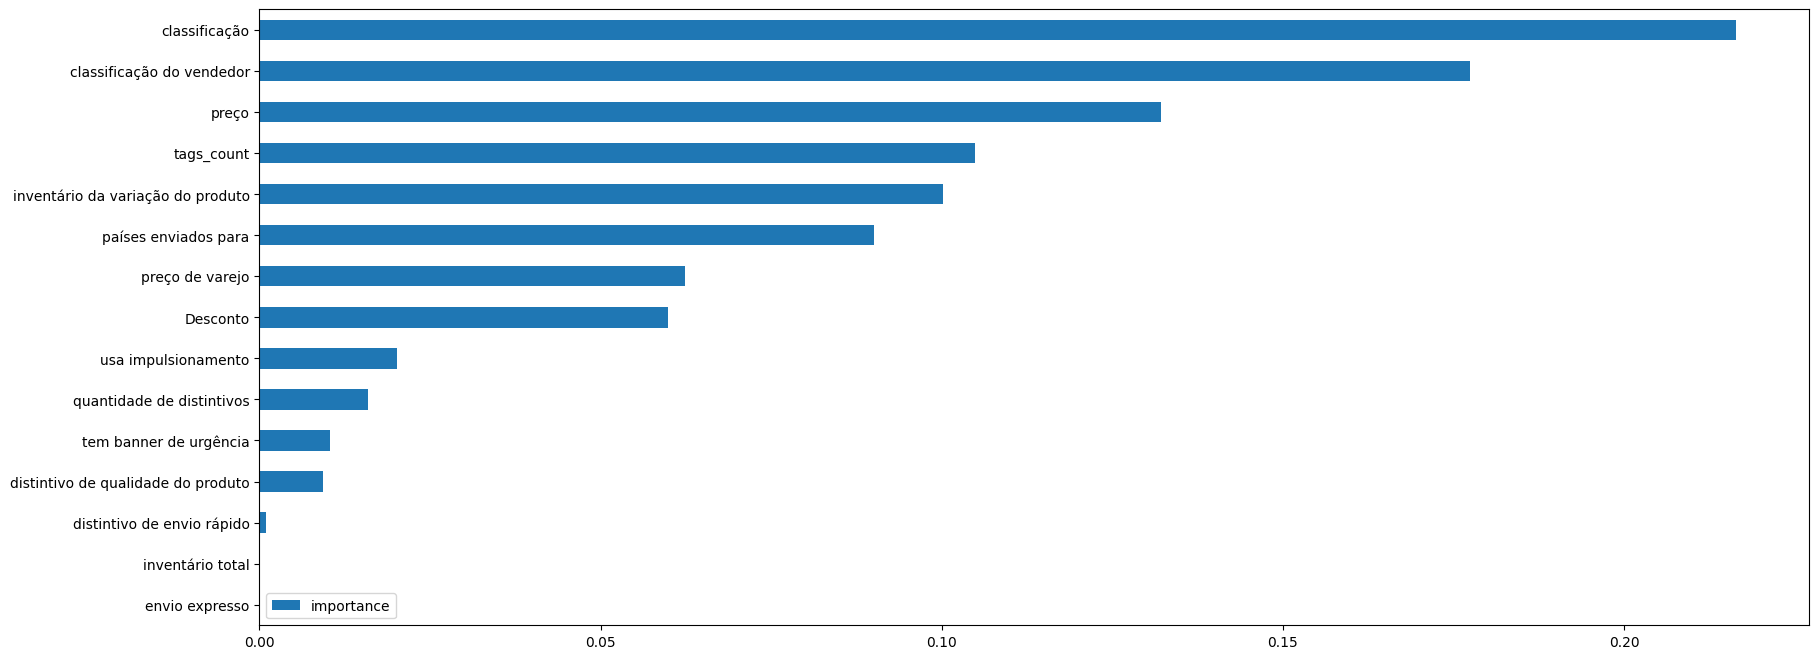

In [99]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


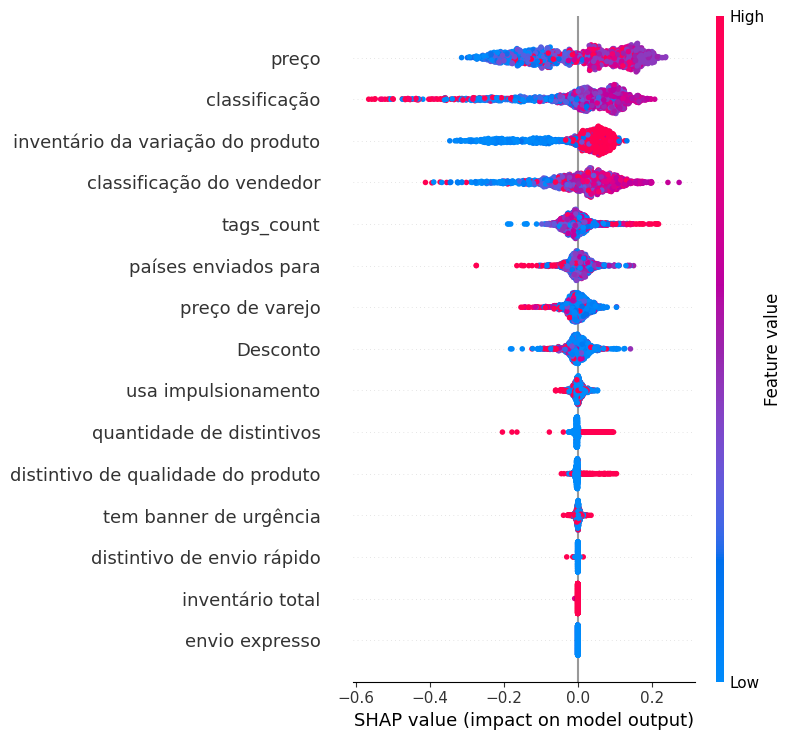

In [101]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(x)
shap.summary_plot(shap_values[1], x)